In [1]:
import glob #to read the files
import json #to work if .json
import numpy as np #to math
import pandas as pd #to save the data
import math #to convertion calculus
from astropy.time import Time #to time converting
from astropy import units #time correction
from astropy.coordinates import SkyCoord #time correction
from scipy import interpolate #to interpolate the wavelength and flux
from tabulate import tabulate #to export in table format
from scipy.interpolate import interp1d
#import scipy.optimize as opt
from scipy import optimize
from scipy import signal
import os.path
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy import stats
import os.path 
import sncosmo

In [2]:
save_path = '/home/joao/Documentos/templates'

In [3]:
kernel = 10.0 * RBF(length_scale=10.0, length_scale_bounds=(5, 15)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

In [4]:
ab = sncosmo.get_magsystem('ab')

In [5]:
%run ./functions.ipynb

In [6]:
hist = []
t0_values = []

In [7]:
#file = open("names.txt")
#lines = file.readlines()
#file.close()

In [8]:
#training_set = []

In [9]:
#for line in lines:
#    if line.startswith('#'): continue
#    co=line.rstrip().replace('INDEF','Nan').split()

#    training_set.append(co[0])

In [10]:
sn_names=glob.glob("*.json")

In [11]:
len(sn_names)

378

In [12]:
for j in range(0,len(sn_names)):  
    
    name = sn_names[j]

    print(name)
    
    with open(name, "r") as read_file:
        data = json.load(read_file)

    url = name
    if url.endswith('.json'):
        url = url[:-5]

    
    redshift = redshift_value(data[url])
    
    if redshift is not None:

        t0 = max_time(data[url])

        mag = []
        time = []

        for i in range(0,len(data[url]["photometry"])):

            if "band" in data[url]["photometry"][i]:

                if data[url]["photometry"][i]["band"] == "B":

                    mag.append(float(data[url]["photometry"][i]["magnitude"]))
                    time.append(float(data[url]["photometry"][i]["time"]))

        if len(time) > 3:

            ntime = []
            nmag = []
            for i in range(0,len(mag)):

                if np.abs(time[i]- min(time)) < 100:

                    nmag.append(ab.band_flux_to_mag(mag[i], 'cspb'))
                    ntime.append([time[i]])

                    #print(np.abs(time[i][0] - min(time[i])))


            gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(ntime, nmag)

            X_ = np.linspace(min(ntime)[0], max(ntime)[0], 1000)

            y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

            y_mean = list(y_mean)

            idx = y_mean.index(max(y_mean))

            if idx > 2: 

                hist.append([X_[idx] - t0,sn_names[j]])
                t0_values.append([X_[idx],sn_names[j]])


SN2006ax.json
0.016725
SN2013bh.json
0.068
SN2001el.json
0.00536
SN2001ie.json
0.030738
SN2007af.json
0.005464
SN2008hu.json
0.05056
SN2000cx.json
0.007929
SN1998dh.json
0.00897
SN1980N.json
0.005871
SN2012fr.json
0.0054
SN2003fd.json
0.060222
SN2002ck.json
0.029864
SN2003ae.json
0.0329
SN2007A.json
0.017653315868428443
SN2007fs.json
0.01719
SN1995ak.json
0.02272
SN2012dn.json
0.010187
SN2005al.json
0.012381930324267376
SN2004bd.json
0.00893
SN2008ar.json
0.026147
SN2006D.json
0.008529
PTF09dlc.json
0.0672
SN2006gj.json
0.02829
SN2013aa.json
0.003999
SN2003M.json
0.02424
SN2008hv.json
0.012526589416171241
SN1998aq.json
0.003699
SN2001iq.json
0.01842
SN2007kk.json
0.041045
SN2000dg.json
0.03849
SN2009dc.json
0.02158
SN2001V.json
0.01502
SN2005cf.json
0.006461
SN1999dk.json
0.01496
SN1990R.json
0.0162
SN2006le.json
0.017432
SN2013ew.json
0.056
SN2008s1.json
0.0221
SN2000E.json
0.00606
SN1998bp.json
0.01043
SN2005ej.json
0.037873
SN2009D.json
0.025007
SN2005hj.json
0.05802511117307718
LSQ

/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


SN2006tr.json
0.2978
SN2006S.json
0.032102
SN2003aa.json
None
SN1994S.json
0.01518
SN1999cp.json
0.00948
SN1991M.json
0.007235
SN2007cp.json
0.036595
SN2007bm.json
0.006211
SN2011by.json
redshift nao encontrado
SN2006sr.json
0.02414
SN2011hr.json
0.013279
SN1997bp.json
0.008309
SN2003iv.json
0.034307
SN2003it.json
0.025121
SN2000dm.json
0.01503
SN2003du.json
0.006381
SN1994ae.json
0.004266
SN2006dd.json
0.005871
SN1998ec.json
0.0199
SN1996ai.json
0.00316
SN1999ee.json
0.01141
SN2002bf.json
0.024197
SN1999by.json
0.002128
PTF10qjq.json
0.0284
SN2005df.json
0.004316
SN2001gc.json
0.01929
SN1997dt.json
0.007318
SN2002hu.json
0.036699
SN1983N.json
0.00321
SN2000cp.json
0.034204
SN2001fh.json
0.01299
SN1998ab.json
None
SN2003W.json
0.020071
SN1986G.json
0.00183
SN1998co.json
0.01807
SN1998bn.json
0.005981
SN2003D.json
0.022109
SN2015bp.json
0.004069
SN1989M.json
0.00507
SN2006H.json
0.01399
SN1991bg.json
0.003539


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


SN2007le.json
0.006721
SN2006dy.json
0.007679
SN2006gz.json
None
SN2006ob.json
0.059238
LSQ14nr.json
0.091
SN1999ac.json
0.0115
SN1998ef.json
0.01774
SN1997Y.json
0.01587
LSQ12ehh.json
0.1
SN2007sw.json
0.0252
LSQ14abd.json
0.1
SN2006ot.json
0.05294
SN1999gm.json
0.042383
SN2008J.json
0.015874


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


SN1999dq.json
0.01433
SN1998V.json
0.01759
SN2002fb.json
0.015567
SN1991B.json
0.008579
SN2005mz.json
0.017559
SN2002ey.json
0.038783
SN2006kf.json
0.02129693315973835
SN1996C.json
None
SN2005cc.json
redshift nao encontrado
SN1994T.json
0.03466
SN2006gr.json
0.034601
SN2012hd.json
0.012
SN2000B.json
0.01983
SN2003kc.json
0.03337
SN2002aw.json
0.026145
SN2012fw.json
0.0186
SN1991T.json
0.005791
SN2005na.json
0.02629016098230008
SN2003iu.json
None
SN2007bd.json
0.03096718391784581
SN1996bo.json
0.01728
SN1994Q.json
0.02956
SN2002cd.json
0.010344
SN2005A.json
0.01914


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


SN2005ke.json
0.00488
SN2006ej.json
0.020458277727554597
SN2007B.json
0.02105
SN1999X.json
0.02517
SN2002kf.json
0.0193
SN2007qe.json
0.0239
SN1999gd.json
0.01851
SN2002es.json
0.02843


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


SN2003hu.json
None
SN2002fk.json
0.007132
SN2006cm.json
0.016341
SN2001ex.json
0.02638
SN1983G.json
0.00618
SN1994D.json
0.00149
PTF09dnp.json
0.037559
SN2001gb.json
0.025731
SN2001ay.json
0.03024
SN2005eu.json
0.034901
SN1996X.json
0.00749
SN2007ca.json
0.014066
SN2000cn.json
0.02349
SN2004ey.json
0.01579444768273275
SN2008R.json
0.01350112193281583
SN2003cg.json
0.00413
SN1998dk.json
0.01322
SN2007ux.json
0.030915
SN2013aj.json
0.009
SN2003ep.json
redshift nao encontrado
SN2011ay.json
0.021


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


SN2004as.json
0.031021
SN2010gn.json
0.0365
SN2006dm.json
0.022019
SN2006is.json
0.031330480283491946
SN1998es.json
0.01057
SN2014J.json
0.000841
SN2007ba.json
0.038513
SN2006bt.json
0.032156
SN2001C.json
0.0109
SN2004fu.json
0.00921
SN2002eu.json
0.037626
SN2009aa.json


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


0.02731
SN2004ef.json
0.031003287895856158
SN2001eh.json
0.037039
SN1995ac.json
0.0499
SN2003Y.json
0.01694
SN2006cp.json
0.022289
PTF10qsc.json
0.0879
SN2012ht.json
0.003559
SN2008ds.json
0.02103
SN2008Q.json
0.007935
SN2006al.json
0.067849
SN2005ao.json
0.038407
SN1996Z.json
0.00829
SN2007hb.json
0.035184
SN2006ef.json
0.017885190122076233
SN2002de.json
0.028116
SN2005am.json
0.007899
LSQ12gdj.json
0.03
SN2007sr.json
0.005417
SN1957B.json
0.00659


SN1999cl.json
0.007609
SN2012cg.json
0.001458
SN1999da.json
0.01269
SN2014at.json
0.035
SN1997br.json
0.006941
LSQ12gpw.json
0.058
SN2008bf.json
0.024027
SN2003eh.json
None
SN2001ep.json
0.013012
SN2007co.json
0.026962
SN1992A.json
0.00626
SN2005kc.json
0.01512
SN1994M.json
0.02316
SN2006ac.json
0.023106
SN2002cs.json
0.01577
SN2006cf.json
0.041549
SN2000fa.json
0.02127
SN2004dt.json
0.01973
SN2000fo.json
0.02386
SN2002jy.json
0.0196
SN2005be.json
0.035001
SN2003hv.json
0.005601
SN2005eo.json
None
SN2006dv.json
0.03297
SN2010ae.json
0.003662
SN1960F.json
0.00398
SN2007nq.json
0.045049248780426154
SN2005ag.json
0.079402
SN2008ia.json
0.02197002237988821
SN2001bg.json
0.007122
SN2005cg.json
redshift nao encontrado
SN2005ls.json


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


0.021118
SN1981B.json
0.006031
SN2009ag.json
0.00864
SN1998de.json
0.01647
SN2008fp.json
0.005656012429203772
SN1972E.json
0.001358
SN2007ao.json
0.0247
SN2013bg.json
0.066
SN2008A.json
0.016455
SN1999cw.json
0.01237
SN2009F.json
0.012946957105361312
SN2005hk.json
0.01306
SN1998eg.json
0.02476
SN2005lu.json
0.03200843849823576
SN2003fa.json
0.006004
SN2000cf.json
0.0438
SN1995D.json
0.006561
SN2007S.json
0.01388
SN2005eq.json
0.028974294942283096
SN2006cz.json
0.041799
SN2002av.json
0.049041
iPTF13dge.json
0.015854
SN1999cc.json
0.03133
SN2006bq.json
0.021905
SN2007su.json
0.02786
SN2003kf.json
0.007388
SN2008bc.json
0.015067397898713919
SN2007ci.json
0.018126
SN2011fe.json
0.000804
SN2002jg.json
0.01574
SN2009ig.json
0.00885
SN1997E.json
0.01354
SN2003ch.json
0.0304
SN2002he.json
0.024564
SN1997do.json
0.01012
SN2005M.json
0.02197499768617539
SN2005el.json
0.01490009610926979
SN2004bg.json
0.021035
SN2002bz.json
0.037149
SN2007gi.json
0.00482
SN2006br.json
0.02459
SN2004at.json
0.0231

SN2006hb.json
0.0153328042114802
SN2001fe.json
0.013539
SN2002ar.json
0.03009
SN2002ha.json
0.014046
SN2006gt.json
0.044771
SN2002hw.json
0.017535
SN2002cu.json
0.023323
PTF10vqv.json
redshift nao encontrado
SN2002do.json
0.015881
SN1998dm.json
0.006541
LSQ12ege.json
0.08
SN2005ki.json
0.019207
SN2001ck.json
0.034721
SN2007au.json
0.020584
SN2006N.json
0.014277
SN1993Z.json
0.00452


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


SN2002cx.json
0.02396
SN2001E.json
0.01926
SN2008Z.json
0.02099
SN2007bc.json
0.02077
SN2008gl.json
0.034017
SN2013hn.json
0.01514
SN2004bv.json
0.01061
SN2001G.json
0.01677
SN1991K.json
0.017
SN2008ec.json
0.016317
SN2003kd.json
0.0302
SN2008dr.json
0.041449
SN2013cs.json
0.009
SN2010jn.json
0.025047
PTF10ops.json
0.06
SN2007bj.json
0.016708
SN2002dj.json
0.009393
SN1954B.json
0.00609


SN2006mr.json
0.00586826659018258
SN1998dx.json
0.054221
SN2009ab.json
0.01117
SN2007ap.json
0.015818


/home/joao/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


SN2007al.json
0.012122
SN1990M.json
0.00904
SN2002er.json
0.008569
SN1990U.json
0.007935
SN2002hd.json
0.035001
SN2001az.json
0.040701
LSQ12fhs.json
0.033145
SN1999aa.json
0.01444
SN2013gh.json
0.0088


In [13]:
hist_1 = []
for i in range(0,len(hist)):
    
    if np.abs(hist[i][0]) < 20:
        
        hist_1.append([hist[i][0], hist[i][1]])

In [14]:
hist_val = []

In [15]:
for i in range(0,len(hist_1)):
    
    hist_val.append(hist_1[i][0])

<IPython.core.display.Javascript object>


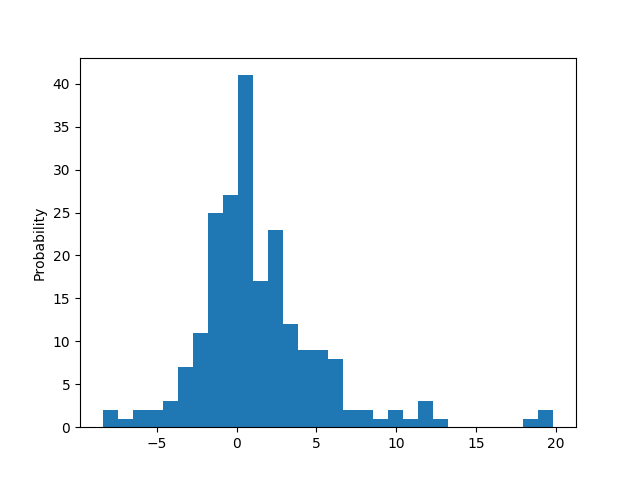

In [24]:
%matplotlib notebook

plt.hist(hist_val, bins=30)
plt.ylabel('Probability')
plt.show()

In [17]:
hist_1

[[2.6646693093061913, 'SN2006ax.json'],
 [-0.29930930931004696, 'SN2001el.json'],
 [0.7814396396424854, 'SN2007af.json'],
 [0.04106106106337393, 'SN2000cx.json'],
 [0.06655655655777082, 'SN1998dh.json'],
 [1.8678378378390335, 'SN1980N.json'],
 [2.2216378378361696, 'SN2012fr.json'],
 [6.561939629631524, 'SN2002ck.json'],
 [4.263501411413017, 'SN2007A.json'],
 [1.4584384384361329, 'SN2007fs.json'],
 [4.227957957955368, 'SN1995ak.json'],
 [-0.04442442442814354, 'SN2012dn.json'],
 [-0.006457117116951849, 'SN2005al.json'],
 [0.5443933933929657, 'SN2008ar.json'],
 [-1.1274243843799923, 'SN2006D.json'],
 [11.913139139142004, 'SN2013aa.json'],
 [2.257964134128997, 'SN2008hv.json'],
 [0.6658768768757, 'SN1998aq.json'],
 [-2.262679729734373, 'SN2007kk.json'],
 [13.118198198193568, 'SN2000dg.json'],
 [0.43507903903810075, 'SN2009dc.json'],
 [-0.5318775975974859, 'SN2001V.json'],
 [0.23930830830795458, 'SN2005cf.json'],
 [-2.7394594594588852, 'SN1999dk.json'],
 [-1.2061297897889744, 'SN2006le.json

In [18]:
len(t0_values)

256

In [19]:
names = []
zerotime = []

In [20]:
for i in range(0,len(t0_values)):
    
    zerotime.append(t0_values[i][0])
    names.append(t0_values[i][1][:-5])

In [21]:
names

['SN2006ax',
 'SN2001el',
 'SN2001ie',
 'SN2007af',
 'SN2000cx',
 'SN1998dh',
 'SN1980N',
 'SN2012fr',
 'SN2002ck',
 'SN2007A',
 'SN2007fs',
 'SN1995ak',
 'SN2012dn',
 'SN2005al',
 'SN2008ar',
 'SN2006D',
 'SN2006gj',
 'SN2013aa',
 'SN2008hv',
 'SN1998aq',
 'SN2007kk',
 'SN2000dg',
 'SN2009dc',
 'SN2001V',
 'SN2005cf',
 'SN1999dk',
 'SN2006le',
 'SN2008s1',
 'SN2000E',
 'SN1998bp',
 'SN2005hj',
 'LSQ12fxd',
 'SN2003cq',
 'SN2006cj',
 'SN2005bo',
 'SN2006te',
 'SN2001br',
 'SN1999ej',
 'SN2008ha',
 'SN2007ai',
 'SN1998bu',
 'SN1992G',
 'SN1997bq',
 'SN2007hj',
 'SN2002cr',
 'SN2005bl',
 'SN2001N',
 'SN2001bp',
 'SN2007cq',
 'SN2002dp',
 'SN2016coj',
 'SN2012hr',
 'SN2009jb',
 'SN1995E',
 'SN2009Y',
 'SN2000dn',
 'SN2007F',
 'SN1995al',
 'SN1990N',
 'SN2006S',
 'SN1994S',
 'SN1999cp',
 'SN2007bm',
 'SN2006sr',
 'SN1997bp',
 'SN2003iv',
 'SN2003it',
 'SN2000dm',
 'SN2003du',
 'SN1994ae',
 'SN1998ec',
 'SN1999ee',
 'SN1999by',
 'SN2005df',
 'SN2001gc',
 'SN2002hu',
 'SN1983N',
 'SN2001fh',

In [22]:
table = []
for l in range(0,len(names)):
    table.append((names[l],zerotime[l]))

name_of_file = "t0_values"

completeName = os.path.join(save_path, name_of_file+".txt")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


<IPython.core.display.Javascript object>


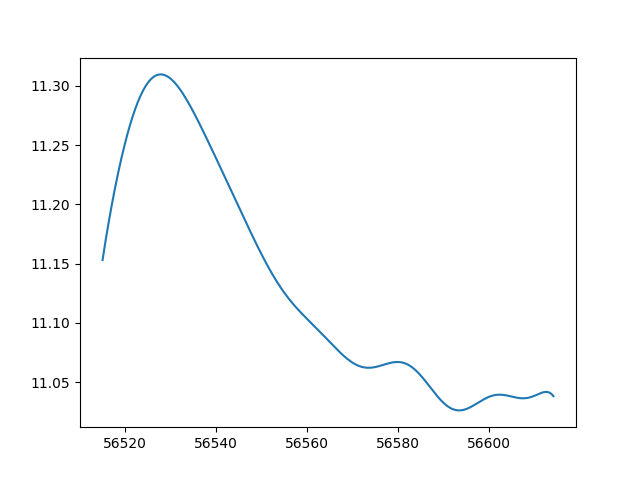

In [23]:
%matplotlib notebook
plt.plot(X_,y_mean)
plt.show()